In [11]:
import numpy as np
import pandas as pd

In [387]:
df = pd.read_csv('sgdata.csv')

In [389]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,single,67,university,124670,skilled employee / official,2
1,100000002,1,non-single (divorced / separated / married / w...,22,high school,150773,skilled employee / official,2
2,100000003,0,single,49,high school,89210,unemployed / unskilled,0
3,100000004,0,single,45,high school,171565,skilled employee / official,1
4,100000005,0,single,53,high school,149031,skilled employee / official,1


In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               2000 non-null   int64 
 1   Sex              2000 non-null   int64 
 2   Marital status   2000 non-null   object
 3   Age              2000 non-null   int64 
 4   Education        2000 non-null   object
 5   Income           2000 non-null   int64 
 6   Occupation       2000 non-null   object
 7   Settlement size  2000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 125.1+ KB


In [393]:
df.isnull().mean() * 100 

ID                 0.0
Sex                0.0
Marital status     0.0
Age                0.0
Education          0.0
Income             0.0
Occupation         0.0
Settlement size    0.0
dtype: float64

# Handling Categorical data

## One hot Encoder

In [413]:

from sklearn.preprocessing import OrdinalEncoder
df = pd.read_csv('sgdata.csv')  

# Standardize the Marital Status categories
df['Marital status'] = df['Marital status'].replace({'single': 'Single', 'non-single (divorced / separated / married / widowed)': 'Non-Single'})

# Modify the Occupation categories
df['Occupation'] = df['Occupation'].replace({'unemployed / unskilled': 'Unemployed'})

# Replace all other occupations with 'Employed'
df['Occupation'] = df['Occupation'].apply(lambda x: 'Employed' if x != 'Unemployed' else x)

# Define the order for ordinal encoding
marital_status_order = ['Single', 'Non-Single']
occupation_order = ['Unemployed', 'Employed']
education_order = ['other / unknown', 'high school', 'university', 'graduate school']

In [415]:
ordinal_encoder = OrdinalEncoder(categories=[marital_status_order, occupation_order, education_order])
df[['Marital status', 'Occupation', 'Education']] = ordinal_encoder.fit_transform(df[['Marital status', 'Occupation', 'Education']])

In [417]:
df.to_csv('updatedsgdata.csv', index=False)

In [421]:
df = pd.read_csv('updatedsgdata.csv') 

In [423]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0.0,67,2.0,124670,1.0,2
1,100000002,1,1.0,22,1.0,150773,1.0,2
2,100000003,0,0.0,49,1.0,89210,0.0,0
3,100000004,0,0.0,45,1.0,171565,1.0,1
4,100000005,0,0.0,53,1.0,149031,1.0,1


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2000 non-null   int64  
 1   Sex              2000 non-null   int64  
 2   Marital status   2000 non-null   float64
 3   Age              2000 non-null   int64  
 4   Education        2000 non-null   float64
 5   Income           2000 non-null   int64  
 6   Occupation       2000 non-null   float64
 7   Settlement size  2000 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 125.1 KB


In [123]:
sum(df.duplicated())

0

### The dataset does not contain missing nor duplicated values. The explanation of each feature is as follows:

###  ID (numerical): a unique identificator of a customer.
### Sex (categorical- binary): Biological sex (gender) of a customer, 0: male 1: female
### Marital status (categorical): Marital status of a customer, 0: single 1: non-single (divorced / separated / married / widowed)}
### Age (numerical): The age of the customer in years 
### Education (categorical): Level of education of the customer, 0 other / unknown 1 high school 2 university 3 graduate school
### Income (numerical) Self-reported annual income in US dollars of the customer.
### Occupation (categorical) Category of occupation of the customer. 0 unemployed / unskilled 1 skilled employee / official 2 management / self-employed / highly qualified employee / officer
### Settlement size (categorical) The size of the city that the customer lives in. 0 small city 1 mid-sized city 2 big city

# EDA

In [130]:
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.683500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.465227,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,1.000000,2.000000


In [134]:
df.corr()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,1.000000,0.328262,0.074403,-0.085246,0.012543,-0.303217,-0.287623,-0.378445
Sex,0.328262,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.156929,-0.300803
Marital status,0.074403,0.566511,1.000000,-0.213178,0.374017,-0.073528,0.013512,-0.097041
Age,-0.085246,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.031507,0.119751
Education,0.012543,0.244838,0.374017,0.654605,1.000000,0.233459,0.003682,0.034732
Income,-0.303217,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.537917,0.490881
Occupation,-0.287623,-0.156929,0.013512,0.031507,0.003682,0.537917,1.000000,0.533037
Settlement size,-0.378445,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.533037,1.000000


In [136]:
summary_statistics = df.describe()

In [138]:
missing_values, summary_statistics

({'Marital status': 100,
  'Age': 65,
  'Education': 169,
  'Income': 29,
  'Settlement size': 100},
                  ID          Sex  Marital status          Age   Education  \
 count  2.000000e+03  2000.000000     2000.000000  2000.000000  2000.00000   
 mean   1.000010e+08     0.457000        0.496500    35.909000     1.03800   
 std    5.774946e+02     0.498272        0.500113    11.719402     0.59978   
 min    1.000000e+08     0.000000        0.000000    18.000000     0.00000   
 25%    1.000005e+08     0.000000        0.000000    27.000000     1.00000   
 50%    1.000010e+08     0.000000        0.000000    33.000000     1.00000   
 75%    1.000015e+08     1.000000        1.000000    42.000000     1.00000   
 max    1.000020e+08     1.000000        1.000000    76.000000     3.00000   
 
               Income   Occupation  Settlement size  
 count    2000.000000  2000.000000      2000.000000  
 mean   120954.419000     0.683500         0.739000  
 std     38108.824679     0.46522

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
sns.set(style="whitegrid")

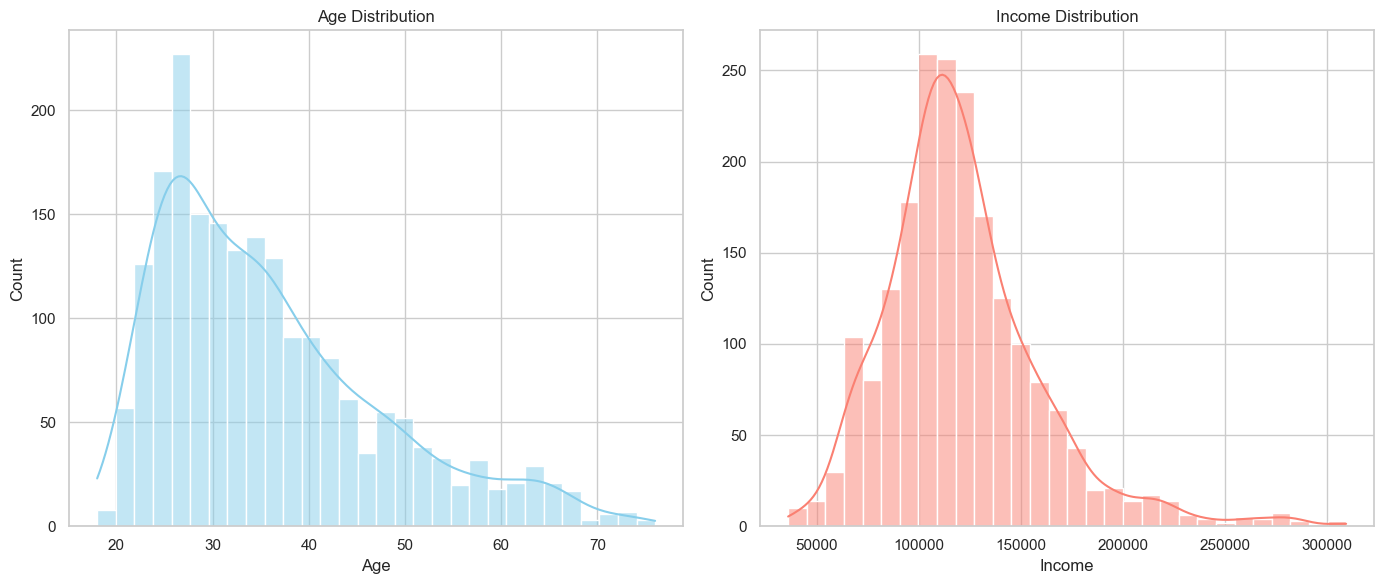

In [144]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Distribution of Age
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue', ax=ax[0])
ax[0].set_title('Age Distribution')

# Distribution of Income
sns.histplot(df['Income'], bins=30, kde=True, color='salmon', ax=ax[1])
ax[1].set_title('Income Distribution')
plt.tight_layout()
plt.show()

In [425]:
# Handling outliers in Income by capping extreme values to the 99th percentile
income_cap = df['Income'].quantile(0.99)
df['Income'] = df['Income'].clip(upper=income_cap)

In [427]:
# Scaling Age and Income using Min-Max scaling (as it's simple and effective for features with different ranges)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Age', 'Income']] = scaler.fit_transform(df[['Age', 'Income']])

In [429]:
df[['Age', 'Income']].describe()

,Age,Income
count,2000.000000,2000.000000
mean,0.308776,0.377426
std,0.202059,0.165787
min,0.000000,0.000000
25%,0.155172,0.274786
50%,0.258621,0.354270
75%,0.413793,0.454368
max,1.000000,1.000000


### EDA

<Axes: >

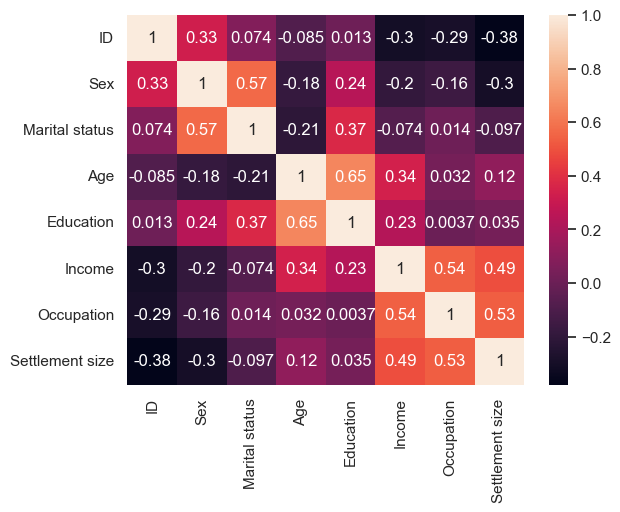

In [158]:
sns.heatmap(df.corr(), annot=True)

#### Strong relation b/w age and income and also b/w income and occupation

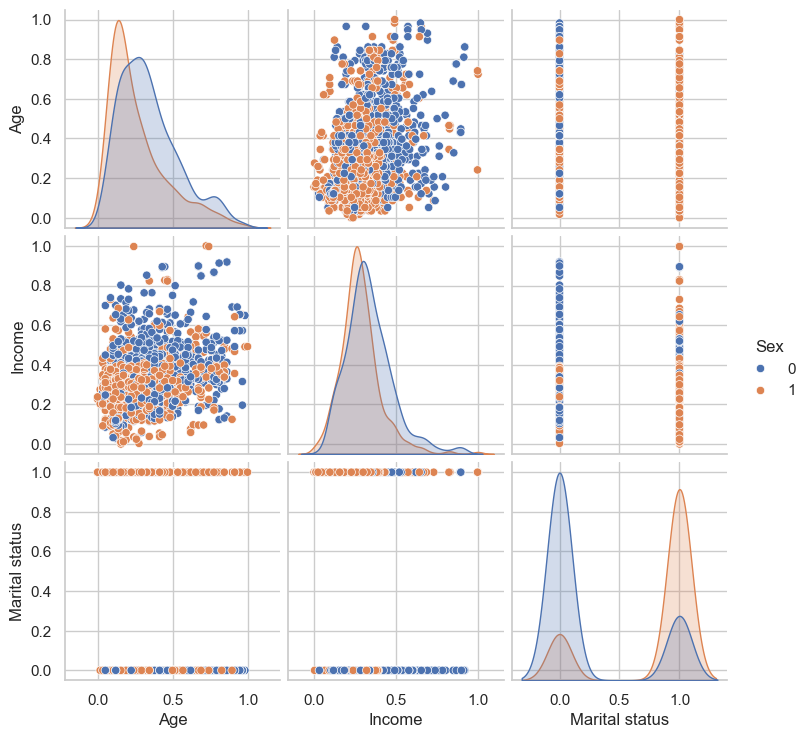

In [183]:
sns.pairplot(df[['Age', 'Income', 'Sex', 'Marital status']], hue='Sex')


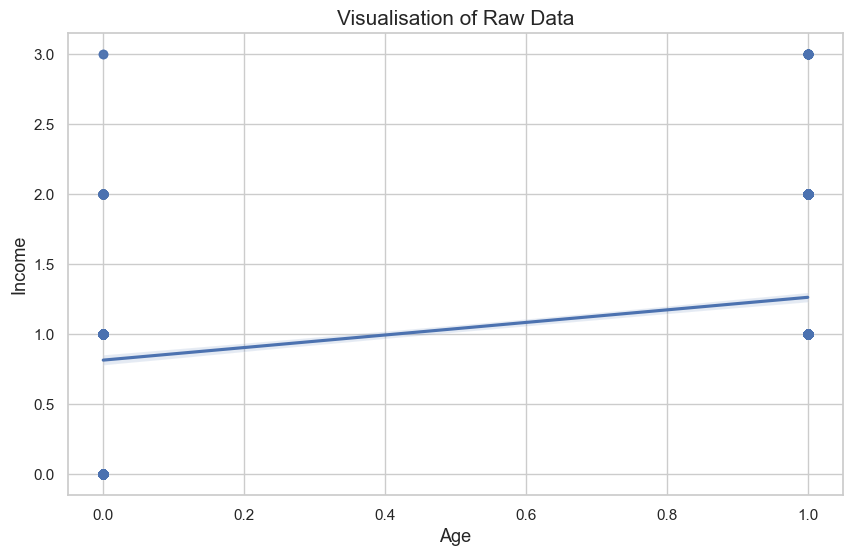

In [434]:

plt.figure(figsize=(10, 6))
sns.regplot(x=df.iloc[:, 2], y=df.iloc[:, 4])
plt.xlabel('Age', fontsize=13)
plt.ylabel('Income', fontsize=13)
plt.title('Visualisation of Raw Data', fontsize=15)
plt.show() 


###  Using a scatter plot with a regression line will allow us to visually assess the relationship between Income and Age, and the regression line will help illustrate the trend

# # feATURE ENGINEERING

In [431]:
# df['Income_per_Age'] = df['Income'] / (df['Age'] + 0.1)

# # Print statistics
# print(df['Income_per_Age'].describe())

# # Plot distribution
# sns.histplot(df['Income_per_Age'], bins=30)
# plt.show()

In [ ]:
# Correlation matrix
# corr_matrix = df[['Income', 'Age', 'Income_per_Age']].corr()
# print(corr_matrix)

# # Visualize the correlation
# sns.heatmap(corr_matrix, annot=True)
# plt.show()


### A high correlation with Income or Age suggests that Income_per_Age might not add much new information.

# 4. Data Analysis
## 4.1. Customer Analysis

In [215]:
from sklearn.preprocessing import StandardScaler 

In [217]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

C:\Users\dubey\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\dubey\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\dubey\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


## ii. Hierarchical Clustering

In [220]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [438]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage
# Load your data
df = pd.read_csv('updatedsgdata.csv')

In [440]:
# Check for missing values
print(df.isnull().sum())

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64


In [442]:
# Fill missing values or drop them
df.fillna(df.mean(), inplace=True)  # Example of filling with the mean

In [444]:
# Convert categorical columns to numeric (if any)
df_encoded = pd.get_dummies(df, drop_first=True)

In [446]:
# Optionally standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

In [470]:
# Perform hierarchical clustering
hier_clust = linkage(df_scaled, method='ward')

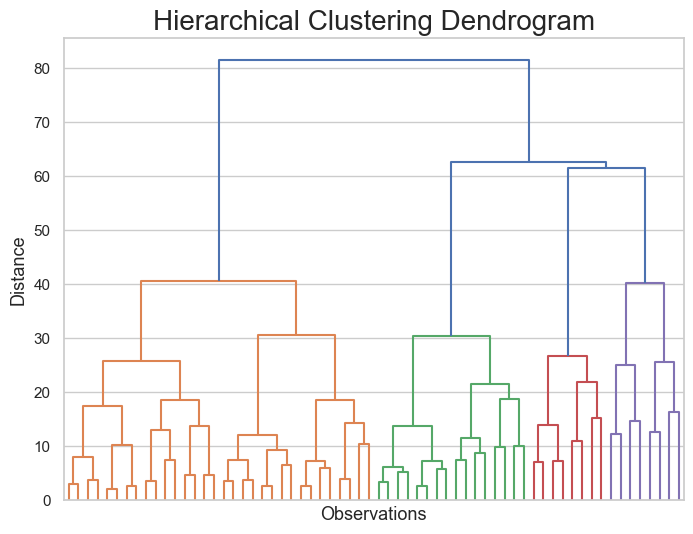

In [472]:
plt.figure(figsize =(8,6))
plt.title('Hierarchical Clustering Dendrogram', fontsize =20)
plt.ylabel('Distance',  fontsize =13)
plt.xlabel('Observations',  fontsize =13)
dendrogram(hier_clust, show_leaf_counts =False, truncate_mode = 'level',  p = 5,  no_labels = True,)
plt.show()

### iii. K-means Clustering

In [474]:
from sklearn.cluster import KMeans

In [476]:
wcss = {}
for i in range(1, 11): 
    kmeans = KMeans(n_clusters =i, init = 'k-means++', random_state= 42)
    kmeans.fit(df_scaled)
    wcss[i] = kmeans.inertia_

Text(0.5, 1.0, 'K-means Clustering - Elbow Method')

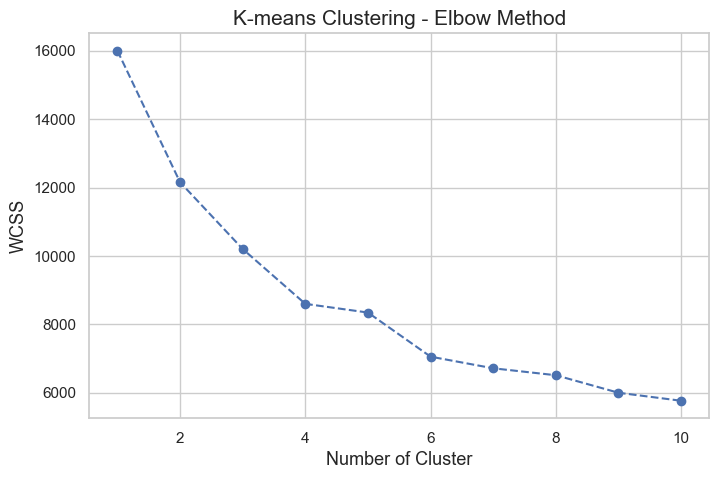

In [478]:
# Elbow method
plt.figure(figsize =(8,5))
plt.plot(list(wcss.keys()), list(wcss.values()),  marker = 'o', linestyle = '--' )
plt.xlabel('Number of Cluster', fontsize = 13)
plt.ylabel('WCSS', fontsize = 13)
plt.title('K-means Clustering - Elbow Method', fontsize = 15)

In [239]:
!pip install kneed

In [490]:
from kneed import KneeLocator
x, y = list(wcss.keys()), list(wcss.values())
kn = KneeLocator(x, y, curve='convex', direction='decreasing')
print('The optimal number of clusters, suggested by Elbow criterion: ', kn.knee) 

The optimal number of clusters, suggested by Elbow criterion:  6


### K-Centroids Clustering Analysis

In [492]:
kmeans =KMeans(n_clusters =4, max_iter = 500,  init = 'k-means++', random_state= 42)

In [494]:
kmeans.fit(df_encoded)

KMeans(max_iter=500, n_clusters=4, random_state=42)

### Results: K-means Clustering

In [496]:
df_segm_kmeans = df.copy()

In [498]:
df_segm_kmeans['Segment_KMeans'] = kmeans.labels_
df_segm_kmeans['Segment_KMeans'].replace({0: "A", 1: "B", 2: "C", 3:"D"}, inplace=True)

C:\Users\dubey\AppData\Local\Temp\ipykernel_6404\3449508698.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_segm_kmeans['Segment_KMeans'].replace({0: "A", 1: "B", 2: "C", 3:"D"}, inplace=True)


In [500]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment_KMeans']).mean()
df_segm_analysis

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment_KMeans,,,,,,,,
A,1.000010e+08,0.507853,0.528796,34.412565,1.003141,114791.137173,0.801047,0.710995
B,1.000006e+08,0.285714,0.400000,44.590476,1.342857,225124.866667,1.000000,1.466667
C,1.000012e+08,0.540373,0.511387,32.231884,0.894410,79085.612836,0.146998,0.163561
D,1.000008e+08,0.301969,0.435449,40.927790,1.192560,154150.634573,0.932166,1.238512


In [502]:
# Compute the size and proportions of the four clusters
df_segm_analysis['N_Obs'] = df_segm_kmeans[['Segment_KMeans', 'Sex']].groupby(['Segment_KMeans'])['Sex'].count()
df_segm_analysis['Prop_Obs'] = df_segm_analysis.N_Obs / df_segm_analysis.N_Obs.sum()
df_segm_analysis

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N_Obs,Prop_Obs
Segment_KMeans,,,,,,,,,,
A,1.000010e+08,0.507853,0.528796,34.412565,1.003141,114791.137173,0.801047,0.710995,955,0.4775
B,1.000006e+08,0.285714,0.400000,44.590476,1.342857,225124.866667,1.000000,1.466667,105,0.0525
C,1.000012e+08,0.540373,0.511387,32.231884,0.894410,79085.612836,0.146998,0.163561,483,0.2415
D,1.000008e+08,0.301969,0.435449,40.927790,1.192560,154150.634573,0.932166,1.238512,457,0.2285


<!-- # Segment A:

# Sex: Balanced gender ratio (~50%).
# Marital Status: Around 53% are in relationships.
# Age: Average age is 34.4 years.
# Education: Low education level (1.00).
# Income: Moderate income (~114,791).
# Occupation: Higher-level jobs (0.80).
# Settlement Size: Lives mostly in medium-sized cities.
# Observations: 955, making up about 47.8% of the total data.
# Inference: Segment A represents moderately educated, middle-aged individuals with decent income levels and professional occupations in medium-sized cities -->

### Segment A:
### Label: "Standard"

### Sex: Balanced gender ratio (~50%).
### Marital Status: Around 53% are in relationships.
### Age: Average age is 34.4 years.
### Education: Low education level (1.00).
### Income: Moderate income (~114,791).
### Occupation: Higher-level jobs (0.80).
### Settlement Size: Lives mostly in medium-sized cities.
### Observations: 955, making up about 47.8% of the total data.
### Inference: Segment A represents moderately educated, middle-aged individuals with decent income levels and professional occupations in medium-sized cities

### Segment B:
### Label: "Well-Off"
### Sex: Predominantly male (~28.6% women).
### Marital Status: 40% are in relationships.
### Age: Higher average age (~44.6 years).
### EDucation: Highest education level (1.34).
### Income: Highest income (~225,125).
### Occupation: Highest-level jobs (1.00).
### Settlement Size: Lives in larger cities.
### Observations: Only 105 individuals (5.25% of the total).
### Inference: This segment consists of highly educated, older males with high incomes and senior-level jobs in large cities.

### Segment C:
### Label: "Fewer Opportunities"
### Sex: Slight male majority (~54% male).
### Marital Status: Around 51% are in relationships.
### Age: Young segment (average age of 32.2 years).
### Education: Lower educational level (0.89).
### Income: Lowest income (~79,086).
### Occupation: Lower-tier jobs (0.15).
### Settlement Size: Lives in small cities.
### Observations: 483 individuals (24.15% of the total).
### Inference: Segment C represents younger individuals with lower incomes and lower-tier jobs, often living in smaller cities.

### Segment D:
### Label: "Career-Oriented"
### Sex: More women (~30% women).
### Marital Status: About 44% are in relationships.
### Age: Average age of 40.9 years.
### Education: Moderate education level (1.19).
### Income: Above-average income (~154,150).
### Occupation: Professional jobs (0.93).
### Settlement Size: Predominantly living in medium to large cities.
### Observations: 457 individuals (22.85% of the total).
### Inference: Segment D consists of middle-aged individuals with moderately high education, good income, and professional jobs, primarily living in medium or larger cities.

In [510]:
df_segm_analysis.rename({'A':'standard', 'B': 'well-off', 'C': 'standard', 'D': 'career_oriented' }, inplace =True)

In [512]:
df_segm_kmeans['Labels']  = df_segm_kmeans['Segment_KMeans'].map({'A':'standard', 'B': 'well_off', 'C': 'fewer_opportunities', 'D': 'career_oriented' })

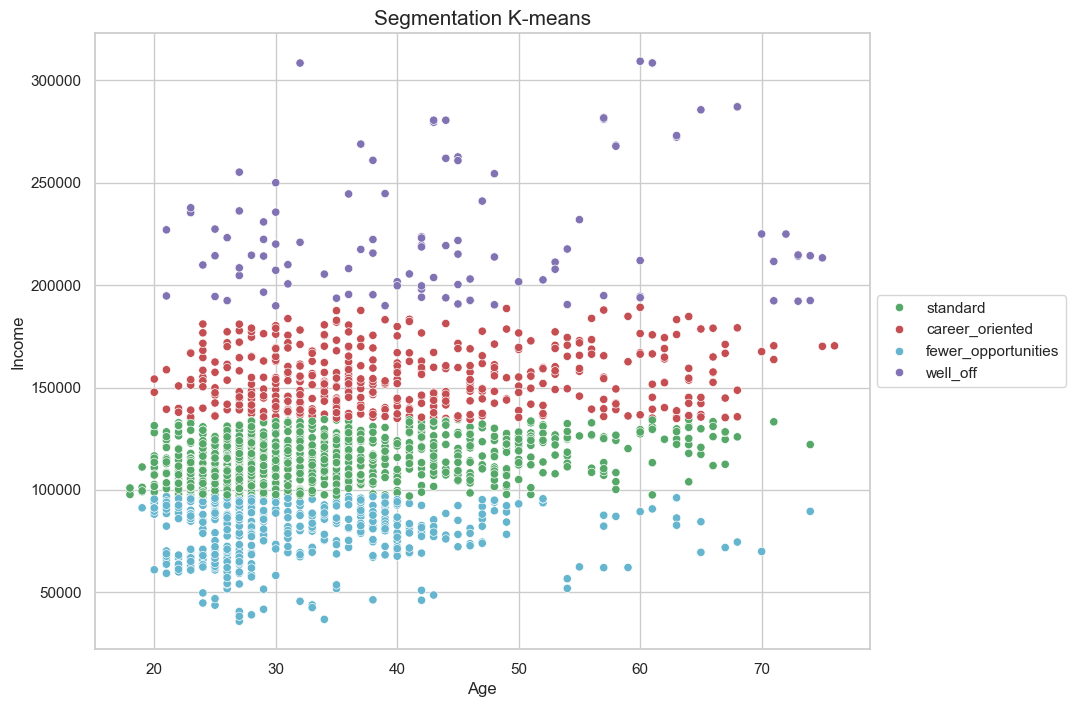

In [514]:
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize=(10, 8))
sns.scatterplot(x=x_axis, y=y_axis, hue=df_segm_kmeans['Labels'], palette=['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means', fontsize=15)
plt.legend(bbox_to_anchor=(1, 0.5), loc=6)
plt.show()

### Novelty

In [336]:

!pip install pyclustering

     ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
     - -------------------------------------- 0.1/2.6 MB 919.0 kB/s eta 0:00:03
     -- ------------------------------------- 0.1/2.6 MB 1.2 MB/s eta 0:00:02
     --- ------------------------------------ 0.2/2.6 MB 1.3 MB/s eta 0:00:02
     ----- ---------------------------------- 0.4/2.6 MB 1.6 MB/s eta 0:00:02
     -------- ------------------------------- 0.6/2.6 MB 2.0 MB/s eta 0:00:01
     ---------- ----------------------------- 0.7/2.6 MB 2.2 MB/s eta 0:00:01
     -------------- ------------------------- 0.9/2.6 MB 2.6 MB/s eta 0:00:01
     ----------------- ---------------------- 1.1/2.6 MB 2.8 MB/s eta 0:00:01
     -------------------- ------------------- 1.3/2.6 MB 2.9 MB/s eta 0:00:01
     ---------------------- ----------------- 1.4/2.6 MB 2.8 MB/s eta 0:00:01
     ----------------------- ---------------- 1.5/2.6 MB 2.9 MB/s eta 0:00:0

In [338]:
from sklearn.cluster import DBSCAN
from scipy.stats import mode
from pyclustering.cluster.clarans import clarans
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

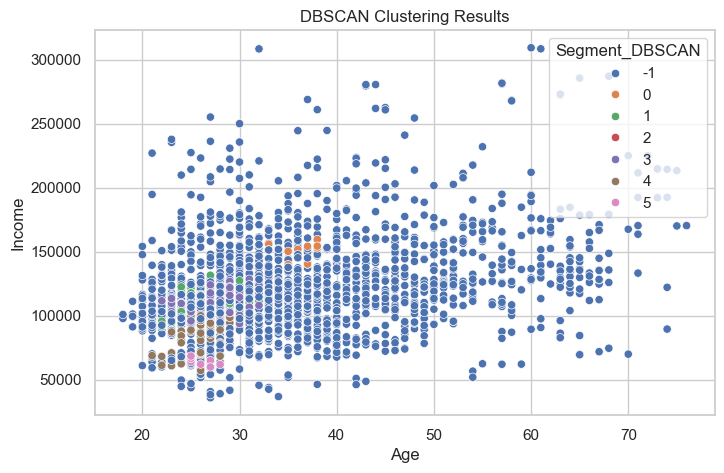

In [340]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.3, min_samples=10)  # Tune hyperparameters based on your dataset
dbscan_labels = dbscan.fit_predict(df_scaled)

# Add DBSCAN results to DataFrame
df_segm_kmeans['Segment_DBSCAN'] = dbscan_labels

# Visualize the DBSCAN clustering result
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Age'], y=df['Income'], hue=df_segm_kmeans['Segment_DBSCAN'], palette='deep')
plt.title('DBSCAN Clustering Results')
plt.show()

# Combine results from K-means, Hierarchical and DBSCAN
df_segm_kmeans['Segment_Hierarchical'] = dendrogram(hier_clust, no_plot=True)['leaves'] 

### Step 3: Consensus Clustering (Voting)

In [353]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN (epsilon and min_samples might need tuning)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

# Identify novelty points (noise points are labeled as -1 by DBSCAN)
novelties = df_encoded[dbscan_labels == -1]

print("Number of novelties detected:", len(novelties))


Number of novelties detected: 546


In [355]:
from scipy.cluster.hierarchy import linkage, fcluster

# Perform hierarchical clustering (Ward's method)
hier_clust = linkage(df_scaled, method='ward')

# Form flat clusters (assuming 4 clusters here)
hier_labels = fcluster(hier_clust, t=4, criterion='maxclust')


In [361]:
from scipy.stats import mode
import numpy as np

# Stack the cluster labels
cluster_labels = np.vstack([df_segm_kmeans['Segment_KMeans'], 
                            df_segm_kmeans['Segment_DBSCAN'], 
                            df_segm_kmeans['Segment_Hierarchical']]).T

# Define a safe mode function to handle empty modes
def safe_mode(x):
    m = mode(x)
    if isinstance(m.mode, np.ndarray):  # Check if mode is a NumPy array
        return m.mode[0] if len(m.mode) > 0 else np.nan
    else:
        return m.mode

# Apply the mode along rows to get the consensus clustering label
final_labels = np.apply_along_axis(safe_mode, axis=1, arr=cluster_labels)

# Assign ensemble labels back to the DataFrame
df_segm_kmeans['Segment_Ensemble'] = final_labels




In [363]:
# Mark novelties (from DBSCAN) in the final ensemble clustering
df_segm_kmeans['Segment_Ensemble'][df_segm_kmeans['Segment_DBSCAN'] == -1] = -1


C:\Users\dubey\AppData\Local\Temp\ipykernel_6404\313808621.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_segm_kmeans['Segment_Ensemble'][df_segm_kmeans['Segment_DBSCAN'] == -1] = -1
C:\Users\dubey\AppData\Local\Temp\ipykernel_6404\3

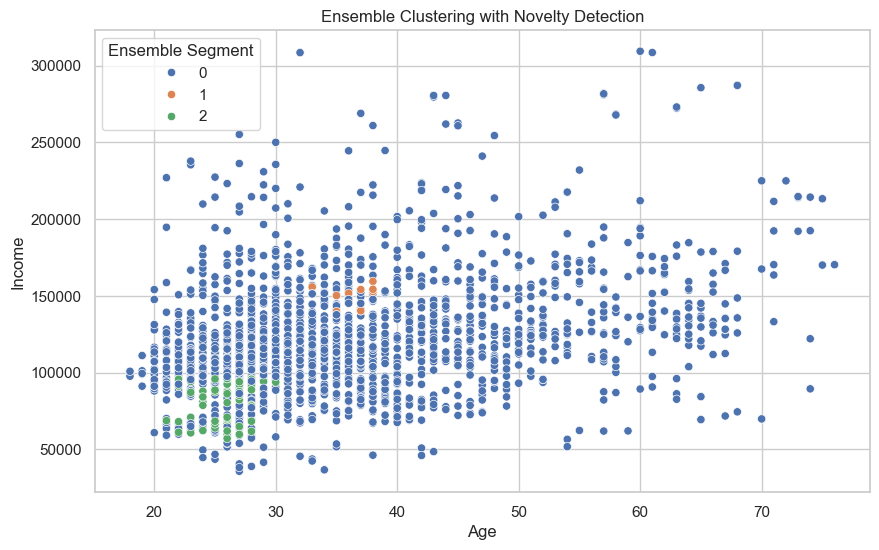

In [365]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize ensemble clustering, including novelties (-1 label)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Age'], y=df['Income'], hue=df_segm_kmeans['Segment_Ensemble'], palette='deep')
plt.title('Ensemble Clustering with Novelty Detection')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(title="Ensemble Segment")
plt.show()

In [367]:
# View the first few rows with the ensemble and novelty labels
df_segm_kmeans[['Segment_KMeans', 'Segment_DBSCAN', 'Segment_Hierarchical', 'Segment_Ensemble']].head()

# Check the number of points in each cluster (including novelty points)
print(df_segm_kmeans['Segment_Ensemble'].value_counts())


Segment_Ensemble
0    1917
2      71
1      12
Name: count, dtype: int64
